### Explanations visualization of ReFine 
#### Example: Mutag & VG-5

In [1]:
import torch
from utils.dataset import get_datasets
from torch_geometric.loader import DataLoader

def demo_viusalization(name, n_sample=3, device=7, save=False):

    train_dataset, val_dataset, test_dataset = get_datasets(name=name)
    test_loader = DataLoader(test_dataset[:n_sample], batch_size=1)
    device = torch.device(f"cuda:{device}" if torch.cuda.is_available() else "cpu")

    refine = torch.load(f'param/refine/{name}.pt')
    refine.remap_device(device)

    for g in test_loader:
        g.to(device)
        refine.explain_graph(g, fine_tune=False)
        print(f"Data ID: {g.name[0]}\n Pretrained Explanation:")
        refine.visualize(save=save)
        refine.explain_graph(g, fine_tune=True, 
                            lr=1e-3, epoch=20)
        print(f" Fine-tuned Explanation:")
        refine.visualize()

Data ID: mutag_103
 Pretrained Explanation:


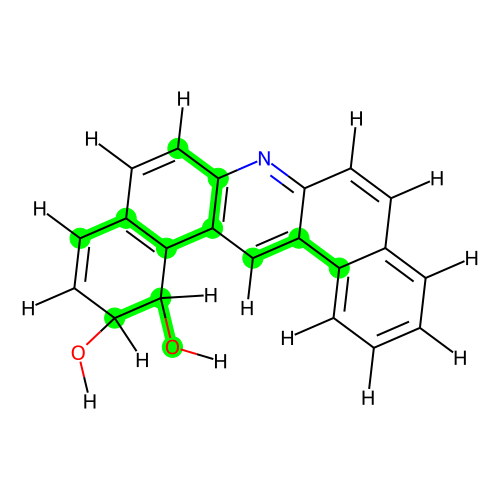

Fine-tuned Explanation:


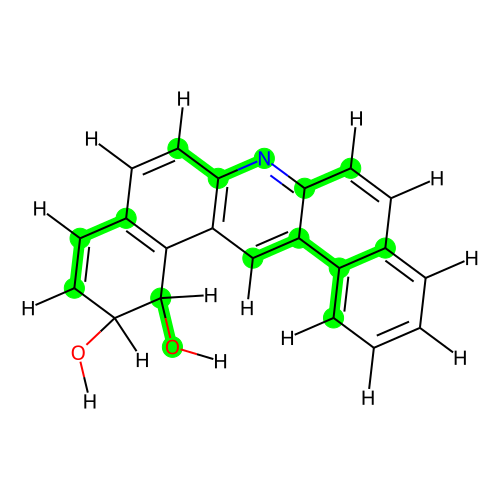

Data ID: mutag_1027
 Pretrained Explanation:


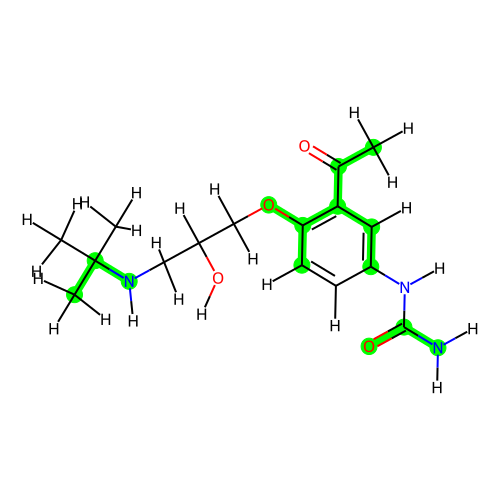

Fine-tuned Explanation:


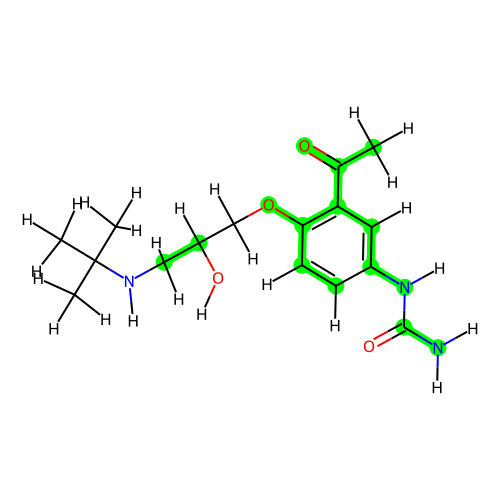

Data ID: mutag_1453
 Pretrained Explanation:


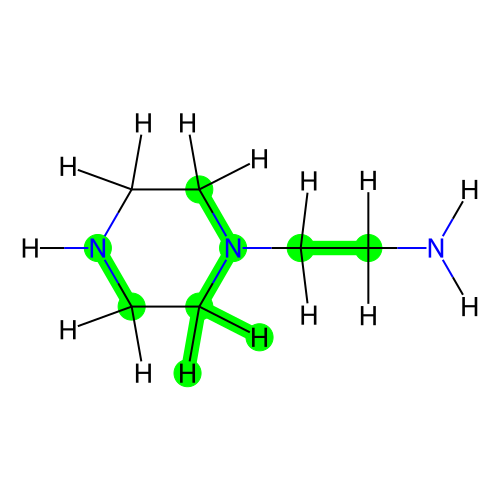

Fine-tuned Explanation:


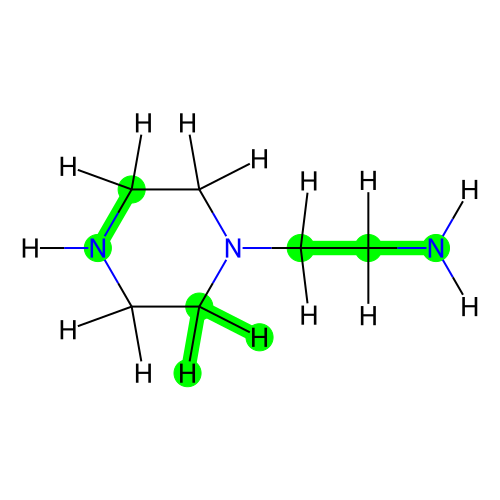

In [2]:
demo_viusalization('mutag')

Data ID: 2409542
 Pretrained Explanation:


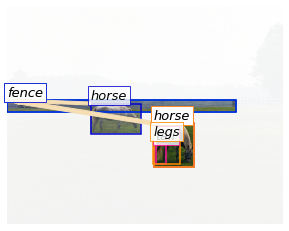

Fine-tuned Explanation:


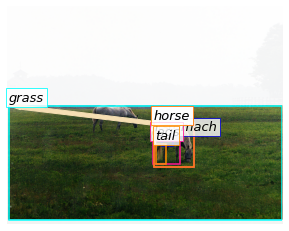

Data ID: 2384971
 Pretrained Explanation:


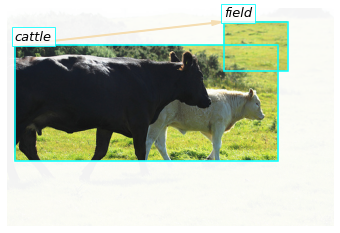

Fine-tuned Explanation:


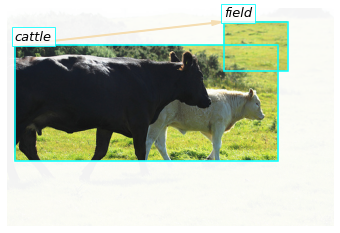

Data ID: 2387229
 Pretrained Explanation:


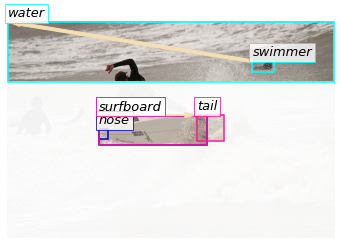

Fine-tuned Explanation:


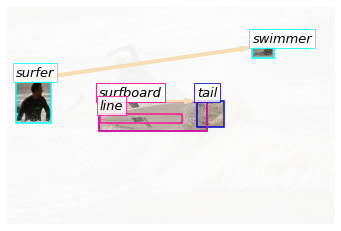

In [3]:
demo_viusalization('vg')